Diabetic Retinopathy

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import os
from keras.preprocessing.image import ImageDataGenerator
import efficientnet.tfkeras as efn
import matplotlib.pyplot as plt

In [42]:
for dirname, _, filenames in os.walk('gaussian_filtered_images/images'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [43]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('gaussian_filtered_images/images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('gaussian_filtered_images/images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [44]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [45]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [46]:
history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=30,verbose=1)

C:\Users\AyhanÇavdar\AppData\Local\Temp\ipykernel_14852\2770684452.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=30,verbose=1)


Epoch 1/30
92/92 [==============================] - 221s 2s/step - loss: 1.0446 - acc: 0.6517 - val_loss: 1.1235 - val_acc: 0.5732 - lr: 1.0000e-04
Epoch 2/30
92/92 [==============================] - 210s 2s/step - loss: 0.7361 - acc: 0.7271 - val_loss: 0.9265 - val_acc: 0.6430 - lr: 1.0000e-04
Epoch 3/30
92/92 [==============================] - 202s 2s/step - loss: 0.6613 - acc: 0.7602 - val_loss: 0.8567 - val_acc: 0.6949 - lr: 1.0000e-04
Epoch 4/30
92/92 [==============================] - 201s 2s/step - loss: 0.6162 - acc: 0.7741 - val_loss: 0.6881 - val_acc: 0.7456 - lr: 1.0000e-04
Epoch 5/30
92/92 [==============================] - 232s 3s/step - loss: 0.5653 - acc: 0.7885 - val_loss: 0.6460 - val_acc: 0.7633 - lr: 1.0000e-04
Epoch 6/30
92/92 [==============================] - 220s 2s/step - loss: 0.5346 - acc: 0.8021 - val_loss: 0.5605 - val_acc: 0.7825 - lr: 1.0000e-04
Epoch 7/30
92/92 [==============================] - 196s 2s/step - loss: 0.4978 - acc: 0.8151 - val_loss: 0.6217

In [52]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

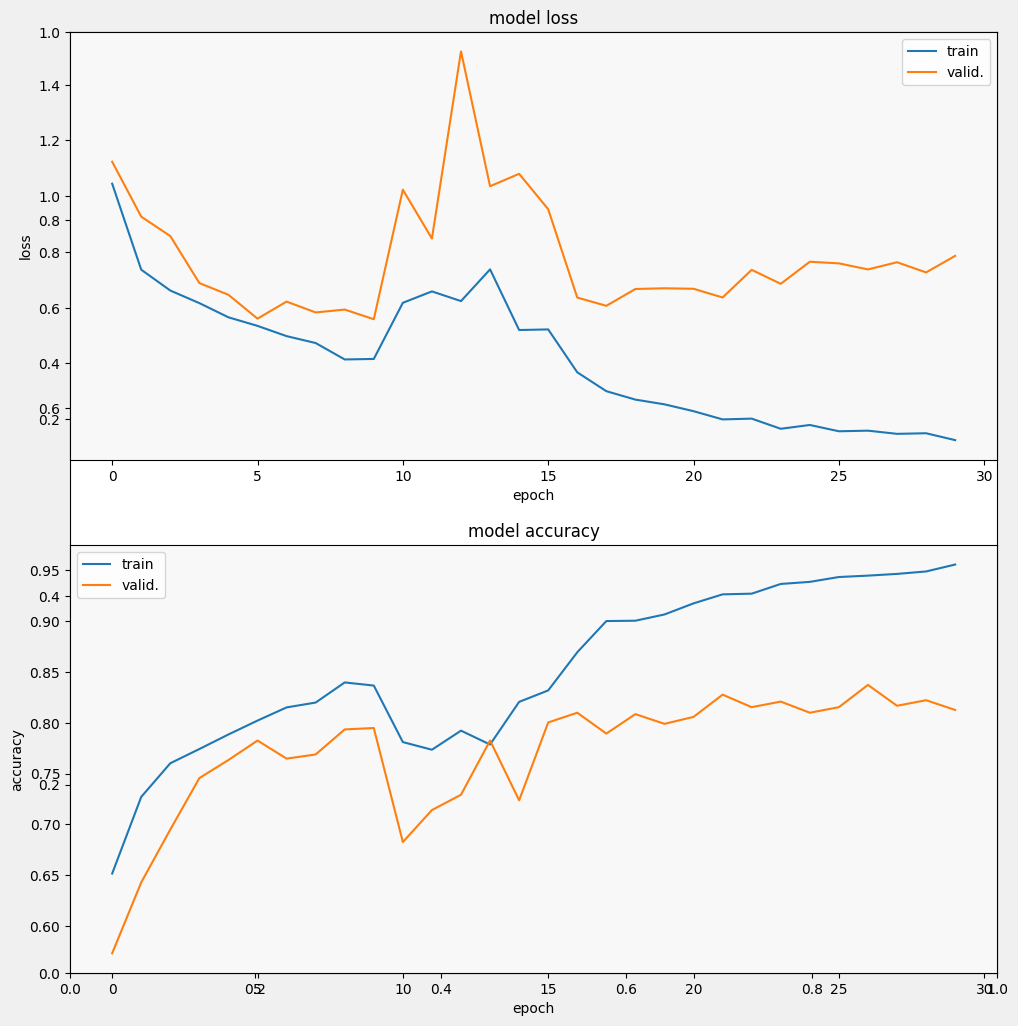

In [53]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)